[[4.24264069 2.        ]
 [3.60555128 1.        ]
 [5.         2.23606798]
 [4.47213595 1.41421356]
 [1.41421356 2.        ]
 [1.         2.23606798]
 [2.23606798 1.        ]
 [2.         1.41421356]]
[[3.20156212 1.16666667]
 [2.5        0.16666667]
 [3.90512484 1.53659074]
 [3.35410197 1.01379376]
 [0.5        2.16666667]
 [0.5        2.71313677]
 [1.11803399 1.30170828]
 [1.11803399 2.08832735]]
[[2.91547595 0.70710678]
 [2.12132034 0.70710678]
 [3.53553391 0.70710678]
 [2.91547595 0.70710678]
 [0.70710678 2.91547595]
 [0.70710678 3.53553391]
 [0.70710678 2.12132034]
 [0.70710678 2.91547595]]
[[2.91547595 0.70710678]
 [2.12132034 0.70710678]
 [3.53553391 0.70710678]
 [2.91547595 0.70710678]
 [0.70710678 2.91547595]
 [0.70710678 3.53553391]
 [0.70710678 2.12132034]
 [0.70710678 2.91547595]]
质心为：[[1.5, 3.5], [3.5, 1.5]]
集群为：[[[1, 3], [1, 4], [2, 3], [2, 4]], [[3, 1], [3, 2], [4, 1], [4, 2]]]


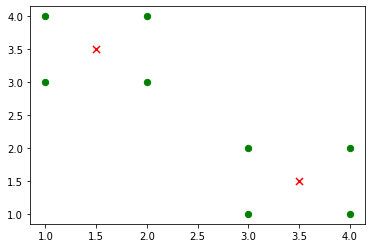

In [9]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算欧式距离
def calcDis(dataSet, centroids, k):
    clalist=[]
    for data in dataSet:
        diff = np.tile(data, (k, 1)) - centroids  #相减   (np.tile(a,(2,1))就是把a先沿x轴复制1倍，即没有复制，仍然是 [0,1,2]。 再把结果沿y方向复制2倍得到array([[0,1,2],[0,1,2]]))
        squaredDiff = diff ** 2     #平方
        squaredDist = np.sum(squaredDiff, axis=1)   #和  (axis=1表示行)
        distance = squaredDist ** 0.5  #开根号
        clalist.append(distance) 
    clalist = np.array(clalist)  #返回一个每个点到质点的距离len(dateSet)*k的数组
    print(clalist)
    return clalist

# 计算质心
def classify(dataSet, centroids, k):
    # 计算样本到质心的距离
    clalist = calcDis(dataSet, centroids, k)
    # 分组并计算新的质心
    minDistIndices = np.argmin(clalist, axis=1)    #axis=1 表示求出每行的最小值的下标
    newCentroids = pd.DataFrame(dataSet).groupby(minDistIndices).mean() #DataFramte(dataSet)对DataSet分组，groupby(min)按照min进行统计分类，mean()对分类结果求均值
    newCentroids = newCentroids.values
 
    # 计算变化量
    changed = newCentroids - centroids
 
    return changed, newCentroids

# 使用k-means分类
def kmeans(dataSet, k):
    # 初始化质心
    centroids = [[0,4],[3,3]]
    
    # 更新质心 直到变化量全为0
    changed, newCentroids = classify(dataSet, centroids, k)
    while np.any(changed != 0):
        changed, newCentroids = classify(dataSet, newCentroids, k)
 
    centroids = sorted(newCentroids.tolist())   #tolist()将矩阵转换成列表 sorted()排序
 
    # 根据质心计算每个集群
    cluster = []
    clalist = calcDis(dataSet, centroids, k) #调用欧拉距离
    minDistIndices = np.argmin(clalist, axis=1)  
    for i in range(k):
        cluster.append([])
    for i, j in enumerate(minDistIndices):   #enymerate()可同时遍历索引和遍历元素
        cluster[j].append(dataSet[i])
        
    return centroids, cluster
 
# 创建数据集
def createDataSet():
    return [[3,1], [3,2], [4,1], [4,2], [1,3], [1,4],[2,3],[2,4]]

if __name__=='__main__': 
    dataset = createDataSet()
    centroids, cluster = kmeans(dataset, 2)
    print('质心为：%s' % centroids)
    print('集群为：%s' % cluster)
    for i in range(len(dataset)):
        plt.scatter(dataset[i][0],dataset[i][1], marker = 'o',color = 'green', s = 40 ,label = '原始点')
    for j in range(len(centroids)):
        plt.scatter(centroids[j][0],centroids[j][1],marker='x',color='red',s=50,label='质心')
    plt.show()